<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolution 연산

원본 이미지와 커널(필터) 사이에 내적(dot) 연산을 순차적으로 이동하면서 특성 데이터를 만드는 연산   


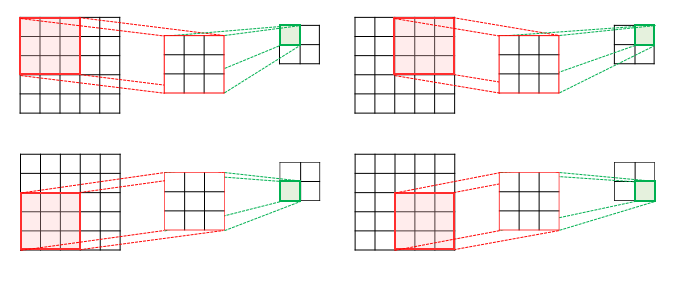

In [ ]:
import numpy as np
arr = np.arange(64)
darr = arr.reshape(8,-1)
darr

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [ ]:
darr[:3,:3] #슬라이스 문법으로 원하는 부분 추출

array([[ 0,  1,  2],
       [ 8,  9, 10],
       [16, 17, 18]])

In [ ]:
kernel = np.array([[0,1,0],[1,0,0],[0,0,1]])
kernel

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
feature = np.zeros((6,6))
for i in range(6):
  for j in range(6):
    da = np.dot(darr[i:i+3,j:j+3],kernel)
    feature[i,j] = da.sum()
print(feature)

[[ 81.  90.  99. 108. 117. 126.]
 [153. 162. 171. 180. 189. 198.]
 [225. 234. 243. 252. 261. 270.]
 [297. 306. 315. 324. 333. 342.]
 [369. 378. 387. 396. 405. 414.]
 [441. 450. 459. 468. 477. 486.]]


In [ ]:
src = np.array([[0,1,2],[8,9,10],[16,17,18]])
print((np.dot(src,kernel)).sum())

81


#Perceptron
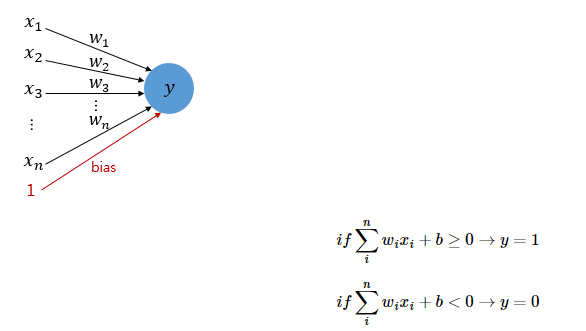

#다층 Perceptron
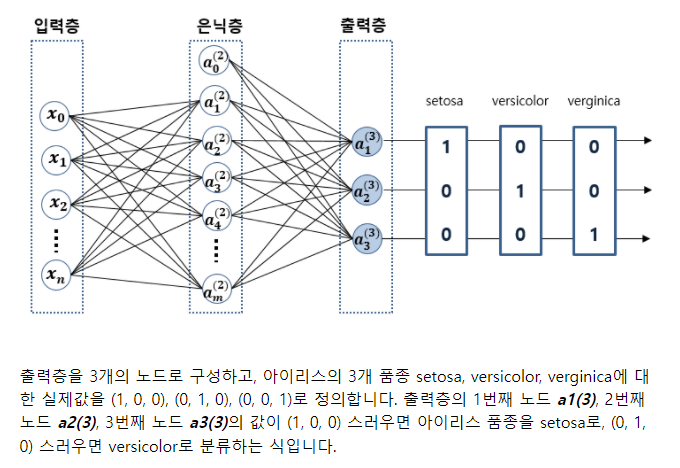

계층을 여러개를 두어도 결국 정리하면 선형 방정식이 나온다.  
ax1 + bx2 + c 형태

#Perceptron 이어서
인간의 뇌세포가 시냅스를 통해 화학물질을 전달하여 사고하는 과정을 모방  
w1(가중치)x1 + w2(가중치)x2 + b(편항,임계치) = 0 : 판별식  
- 판별식 >= 0 -> y=True  
- 판별식 < 0 -> y=False  

(T,F) = (1,1), (1,0), (0,1), (0,0)를 평면에 점으로 나타낼 수 있음  
  - OR 일 때, (0,0) 위를 지나가는 판별식 - 위T,아래F
  - AND 일 때, (1,1) 아래를 지나가는 판별식 - 위T,아래F

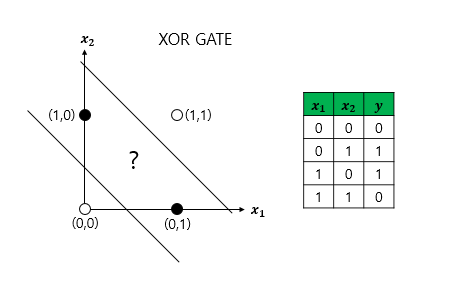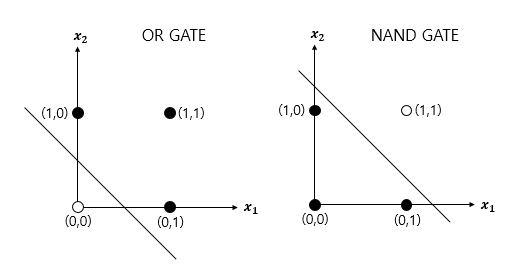

https://techblog-history-younghunjo1.tistory.com/72

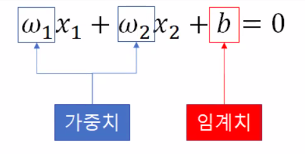

단층 퍼셉트론으로 두 개의 입력으로 구성한 or,and,xor 논리 회로의 결과를 판별하는 코드를 작성해보자.

In [ ]:
#[[x1,x2,y],[x1,x2,y],...]
#0:False , 1:True

ds_or = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
ds_and = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
ds_xor = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]

In [ ]:
#구해야 하는 값은 x1의 가중치 w1, x2의 가중치 w2, 그 외에 y에 영향을 주는 것 b(편향, 임계치)
w1, w2, b = 0,0,0
def setwb(wt1,wt2,bt): #w1,w2,b를 원하는 값으로 설정하는 함수 정의 (원하는 값은 테스트 값)
  global w1,w2,b
  w1,w2,b = wt1, wt2, bt

In [ ]:
def discriminate(x1,x2): #판별식
  if (w1*x1 + w2*x2 + b <= 0): #판별식보다 같거나 아래쪽이면 거짓
    return 0
  else: #판별식보다 크면 참
    return 1

In [ ]:
def test(ds,wt1,wt2,bt): #ds에 있는 데이터를 wt1,wt2,bt 를 적용했을 때, 성적을 테스트하는 함수
  setwb(wt1,wt2,bt) #테스트할 wt1,wt2,bt로 설정
  ok, total = 0,0 #맞춘 개수와 전체 데이터 개수를 기억할 변수를 0으로 초기화
  for x1,x2,y in ds:
    if discriminate(x1,x2) == y:
      ok += 1
    total += 1
  return ok/total #스코어 반환

In [ ]:
def myr(s,e,st): #range와 같은 목적의 함수, step이 실수
  r = s
  while(r<e):
    yield r #myr 함수를 test함수의 for문의 in뒤에 표현했을 때(ds자리), for와 in 사이의 변수가 갖는 값
    r += st

In [ ]:
def find_wb(ds): #기계 학습 함수
  for wt1 in myr(0,1,0.1):
    for wt2 in myr(0,1,0.1):
      for bt in myr(-1,0,0.1):
        if test(ds,wt1,wt2,bt) == 1.0: #모든 테스트를 했을 때, 성적이 100점인 경우
          return True #성공
  return False #100점 없으면 실패 (실제 Deep Learning에서는 가장 높은 점수를 받은 가중치와 편향으로 결정)

In [ ]:
print(find_wb(ds_or))
print(f'w1:{w1},w2:{w2},b:{b}')
print(find_wb(ds_and))
print(f'w1:{w1},w2:{w2},b:{b}')
print(find_wb(ds_xor))

True
w1:0.1,w2:0.1,b:-1.3877787807814457e-16
True
w1:0.1,w2:0.1,b:-0.10000000000000014
False


#활성함수
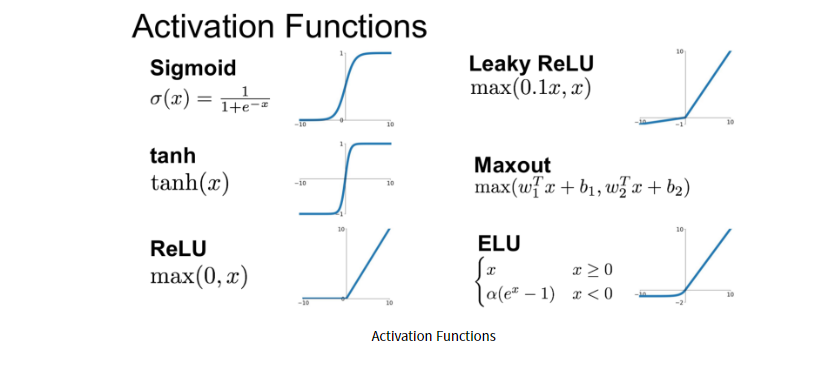

결론적으로 활성화 함수는 입력값을 non-linear한 방식으로 출력값을 도출하기 위해 사용한다.

이를 통해 linear system을 non-linear한 system으로 바꿀 수 있게 되는 것이다. 

그러나, 이렇게 활성화 함수를 이용하여 비선형 시스템인 MLP를 이용하여 XOR는 해결될 수 있지만, MLP의 파라미터 개수가 점점 많아지면서 각각의 weight와 bias를 학습시키는 것이 매우 어려워 다시 한 번 침체기를 겪게되었다.

그리고 이를 해결한 알고리즘이 바로 역전파(Back Propagation)이다. 

https://ganghee-lee.tistory.com/30

#역전파
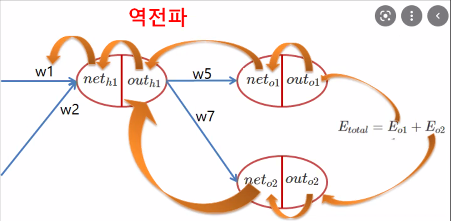

#Optimizer
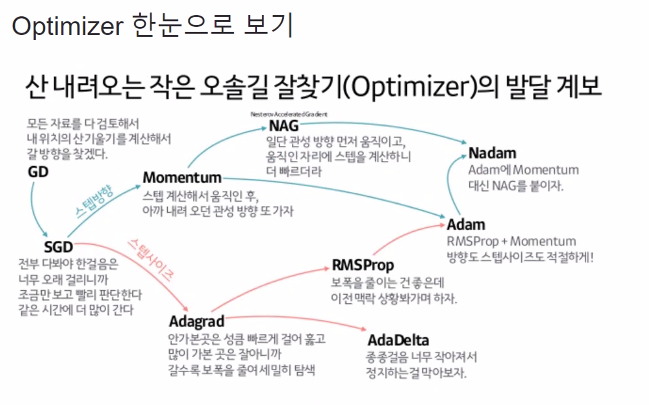